In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import time 
import sys 
sys.path.append('/Users/aleksandra/Desktop/Research/ILC_params/')

from HOD import *
from ilc_params import *

font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

# Settings 

In [24]:
color = "blue"

CIB_model = "websky"
CIB_model2 ="fiona"

In [25]:
path_to_files = "/Users/aleksandra/software/ILC_class-sz_curves_data/ilc-moto-2-15_"+CIB_model+"/ell_dl_"
path_to_files2 ="/Users/aleksandra/software/ILC_class-sz_curves_data/ilc-moto-2-15_"+CIB_model2+"/ell_dl_"
nu_list = 93,100,143,145,217,225,280,353
nu_list_str = '93,100,143,145,217,225,280,353'

In [4]:

def plotfunction(linear=False, **kwargs):   
    plt.figure(figsize=(8,6))
    plt.title(r"", fontsize=30,  **kwargs )
    plt.xlabel(r"$\ell$", size=30)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)  
    plt.grid(which='both',alpha=0.2)
    plt.yscale("log")
    plt.xscale("log")
    if linear == True:
        plt.yscale("linear")
        plt.xscale("linear")
         

In [5]:
if color=="blue":
    hod_pdict = blue_hod_pdict
    s = s_blue
    A_shot_noise = A_shot_noise_blue
if color=="green":
    hod_pdict = green_hod_pdict
    s = s_green
    A_shot_noise = A_shot_noise_green
if color=="red":
    hod_pdict = red_hod_pdict  
    s = s_red
    A_shot_noise = A_shot_noise_red
    
hod_pdict['galaxy_sample_id']

'blue'

## tSZ

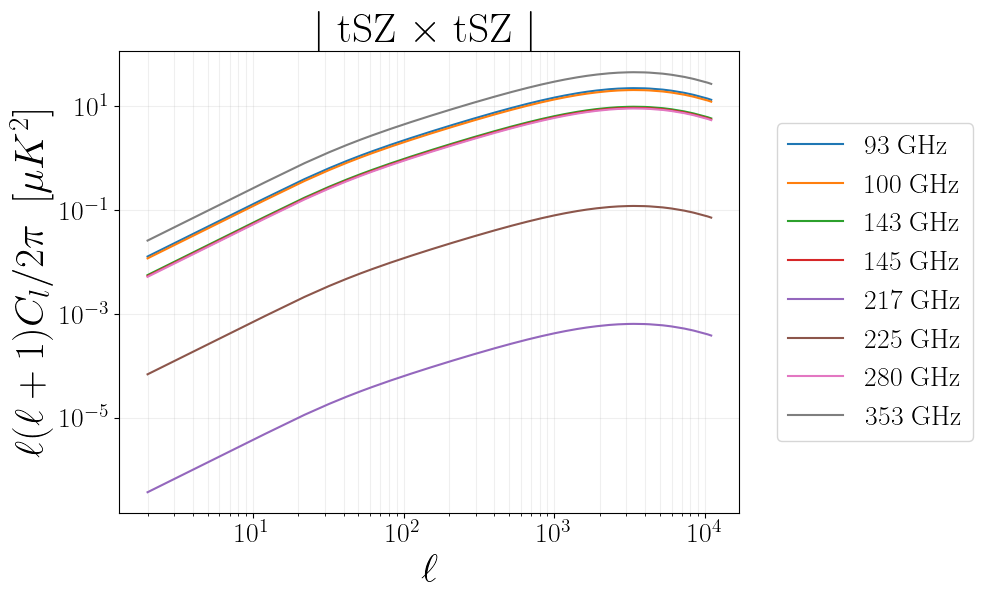

In [6]:
plotfunction()
plt.title("$|$ tSZ $\\times$ tSZ $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", size=30)


for (i,nu) in enumerate(nu_list):
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    plt.plot(ell, tsz, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB 

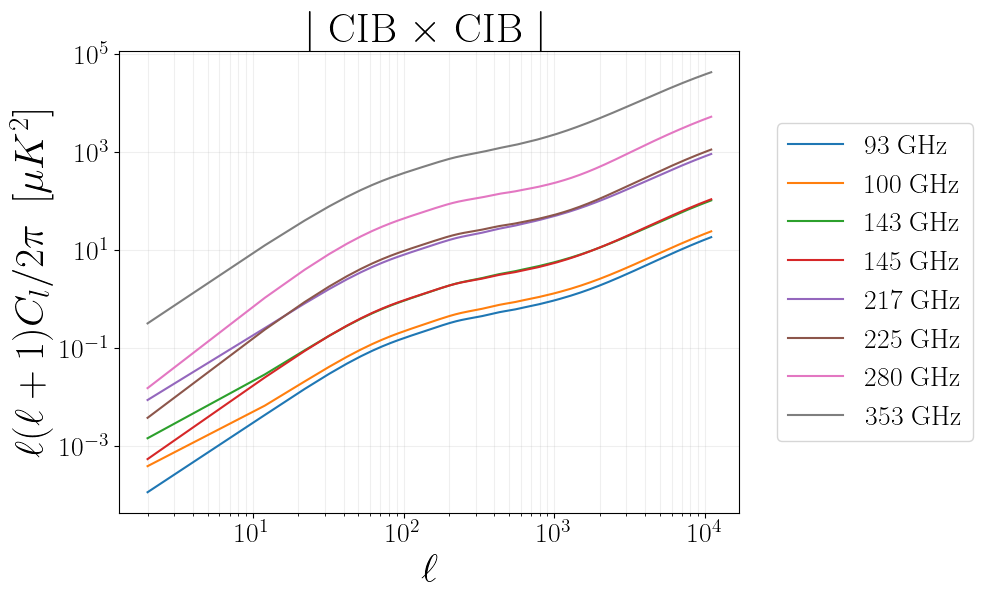

In [7]:
plotfunction()
plt.title("$|$ CIB $\\times$ CIB $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", size=30)


for (i,nu) in enumerate(nu_list):
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    plt.plot(ell, cib, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## tSZ x CIB

93
100
143
145
217
225
280
353


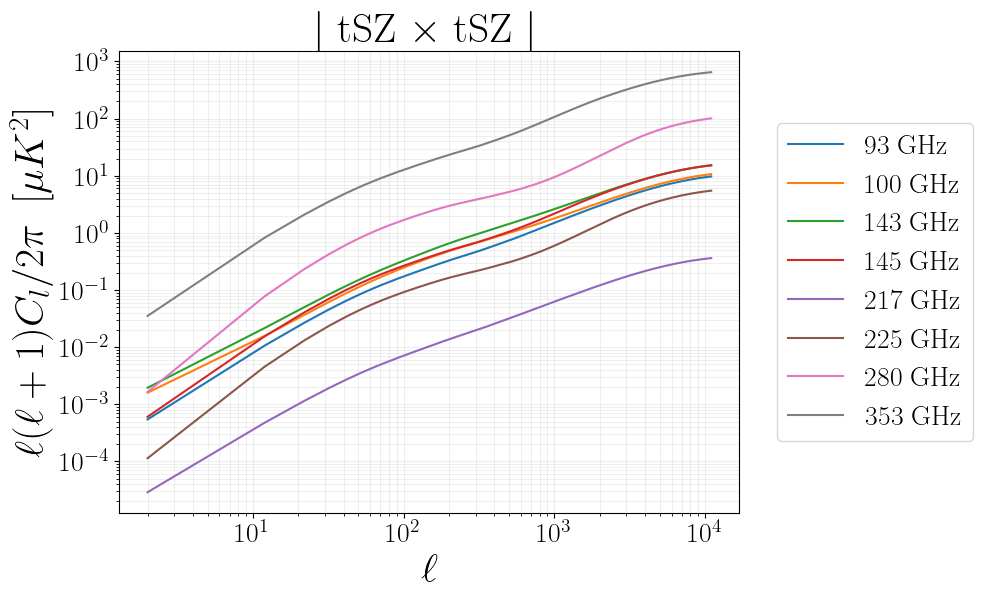

In [8]:
plotfunction()
plt.title("$|$ tSZ $\\times$ tSZ $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", size=30)


for (i,nu) in enumerate(nu_list):
    print(nu)
    ell, tsz_cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxCIB.txt")
    plt.plot(ell, abs(tsz_cib), label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## tSZ x g 

93
100
143
145
217
225
280
353


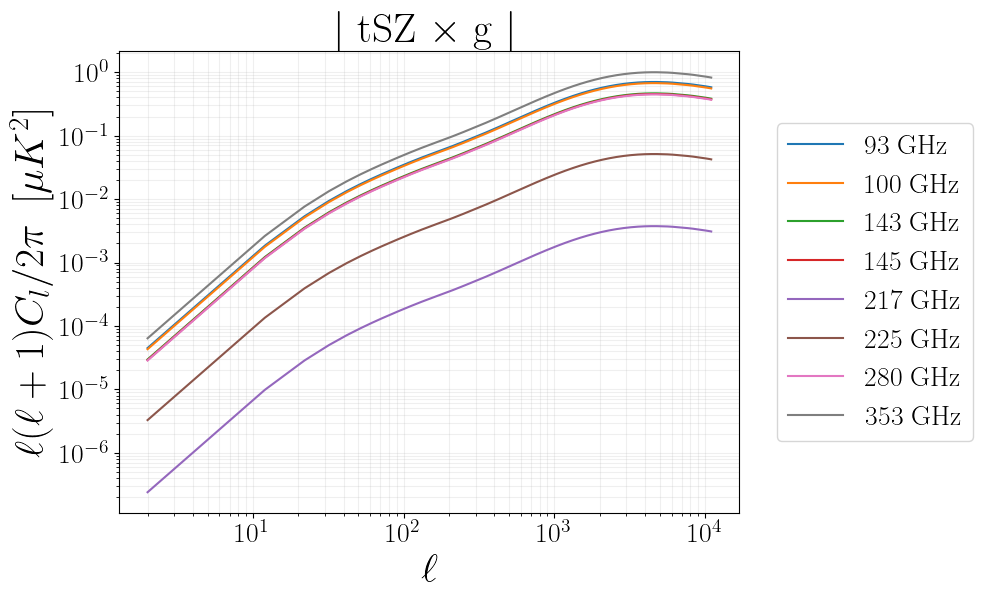

In [9]:
plotfunction()
plt.title("$|$ tSZ $\\times$ g $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l/ 2 \pi \,\,\, [\mu K^2]$", size=30)


for (i,nu) in enumerate(nu_list):
    print(nu)
    ell, tsz_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxg_wLensmag_"+color+".txt")
    plt.plot(ell, abs(tsz_g), label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB x g 

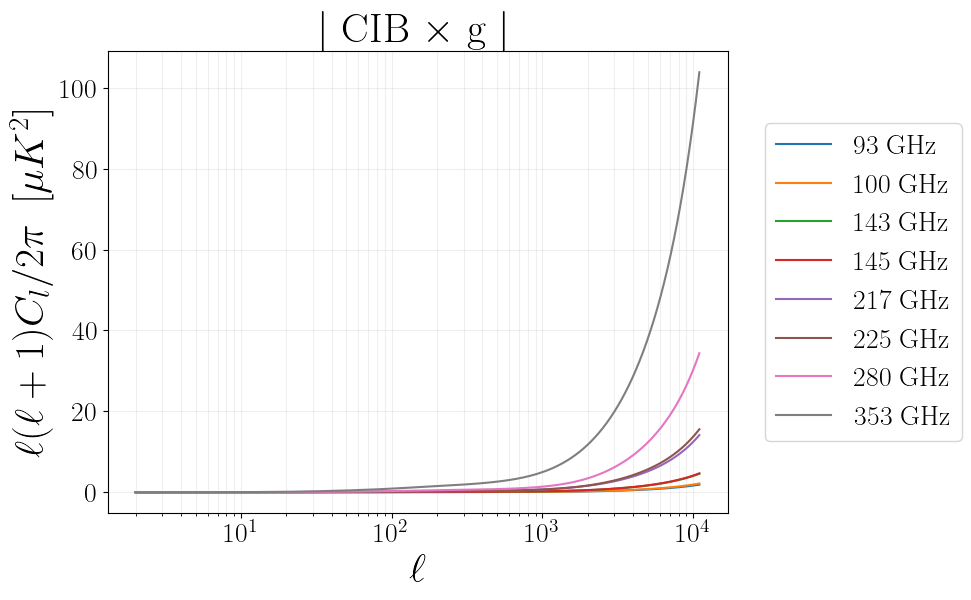

In [10]:
plotfunction()
plt.title("$|$ CIB $\\times$ g $|$", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l/ 2 \pi \,\,\, [\mu K^2]$", size=30)
plt.yscale('linear')

for (i,nu) in enumerate(nu_list):
    ell, cib_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxg_wLensmag_"+color+".txt")
    plt.plot(ell, cib_g, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

##  gg

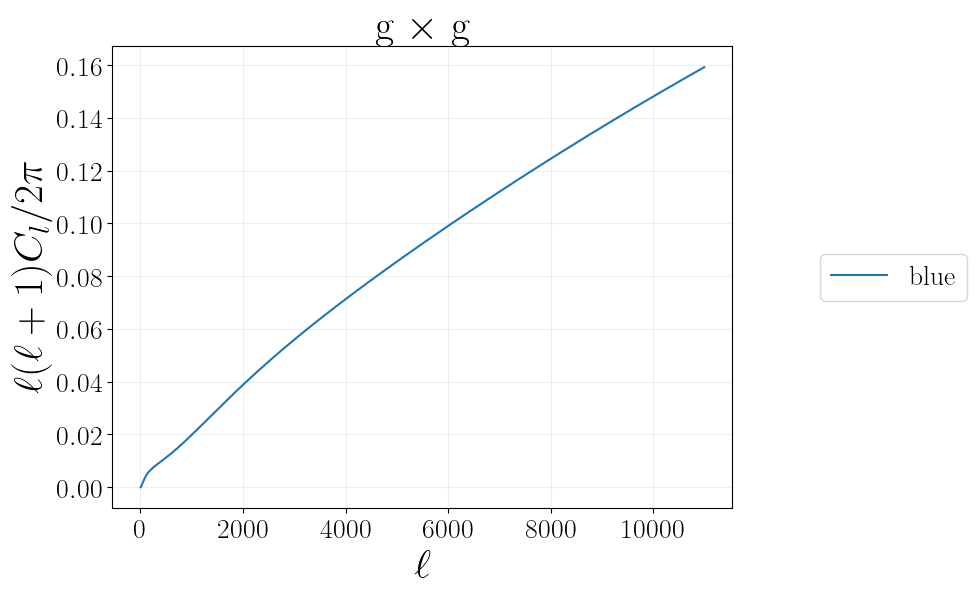

In [11]:
plotfunction()
plt.title(" g $\\times$ g ", fontsize=30)
plt.ylabel(r"$ \ell (\ell+1) C_l/ 2 \pi \,\,\,$", size=30)
plt.yscale('linear')
plt.xscale('linear')

ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_"+color+"_x_"+color+".txt")
plt.plot(ell, gg, label = color)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

# Plot everything 

In [12]:
ell

array([2.0000e+00, 1.2000e+01, 2.2000e+01, ..., 1.0972e+04, 1.0982e+04,
       1.0992e+04])

# Correlation coefficients

## CIB x tSZ

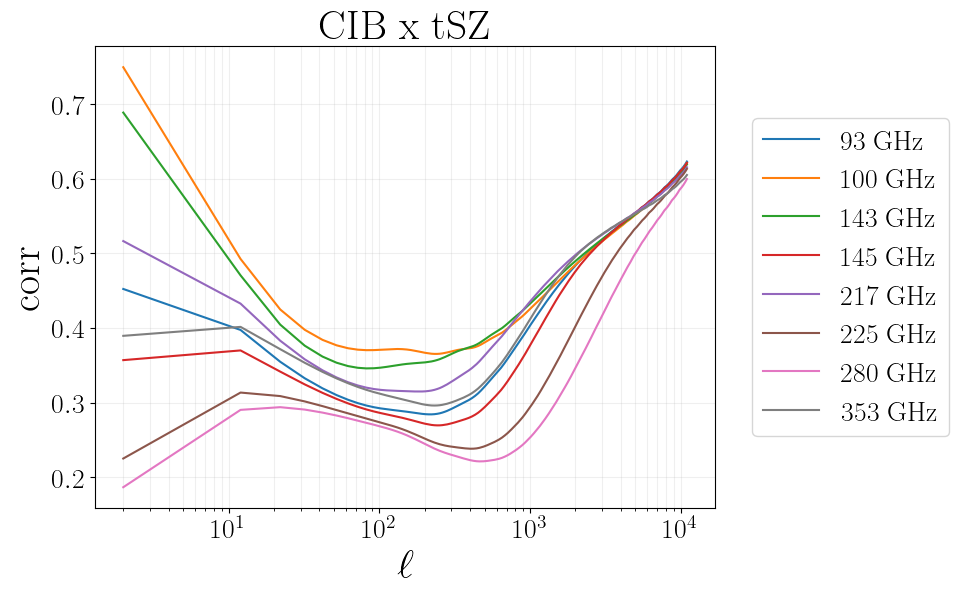

In [13]:
plotfunction()
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x tSZ', fontsize=30)
plt.xscale('log')
plt.yscale('linear')

for (i,nu) in enumerate(nu_list):
    ell, tsz_cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxCIB.txt")
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")

    corr = abs(tsz_cib) /np.sqrt((cib)*tsz)   
    plt.plot(ell, corr, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

##  tSZ x g 


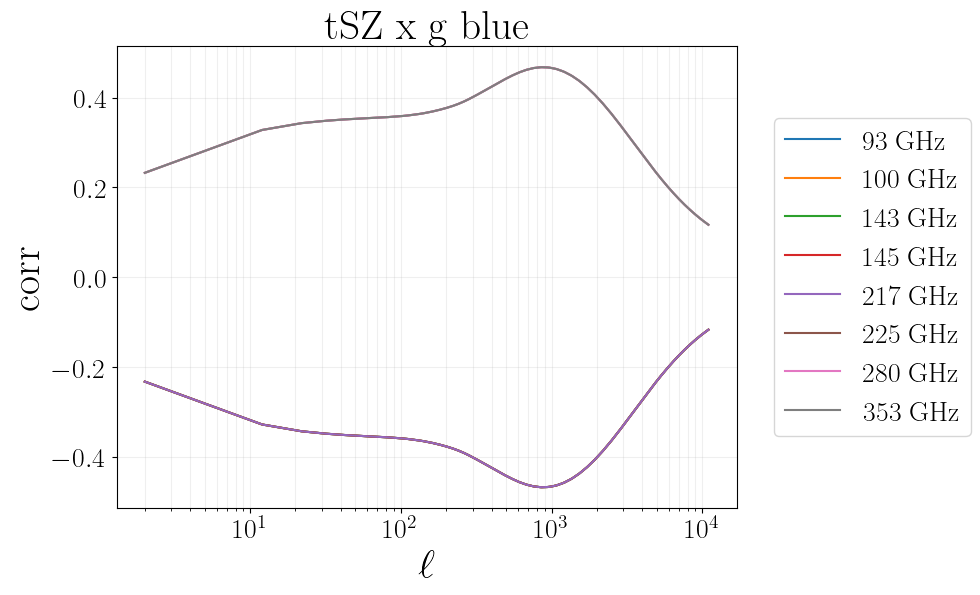

In [14]:
plotfunction()
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('tSZ x g %.6s'%(color), fontsize=30)
plt.xscale('log')
plt.yscale('linear')
for (i,nu) in enumerate(nu_list):
    ell, tsz_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxg_wLensmag_"+color+".txt")
    ell, tsz = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_tSZxtSZ.txt")
    #shot noise
    ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_"+color+"_x_"+color+".txt")
    SN_gg = A_shot_noise * (ell)*(ell+1) /2/np.pi
    gg_full = gg + SN_gg

    corr = (tsz_g) /np.sqrt((gg_full)*tsz)   
    plt.plot(ell, corr, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)

## CIB x g 

In [15]:
 A_shot_noise

8.664928830869256e-08

In [16]:
def convert_Jysr_to_uK(nu_in_GHz):
    # Appendix A of Fionas paper https://arxiv.org/pdf/2010.16405.pdf
    x = nu_in_GHz/56.233
    dB_MJy = 968*np.exp(x)*(nu_in_GHz/100)**4/(np.exp(x)-1)**2
    return dB_MJy

cib_planck_table = {
'93':0.15, 
'100':    0.15, 
'143':    1.2, 
 '145':   1.2, 
 '217':   16,    
 '225':   16, 
 '280':   120,  
 '353':   225
}


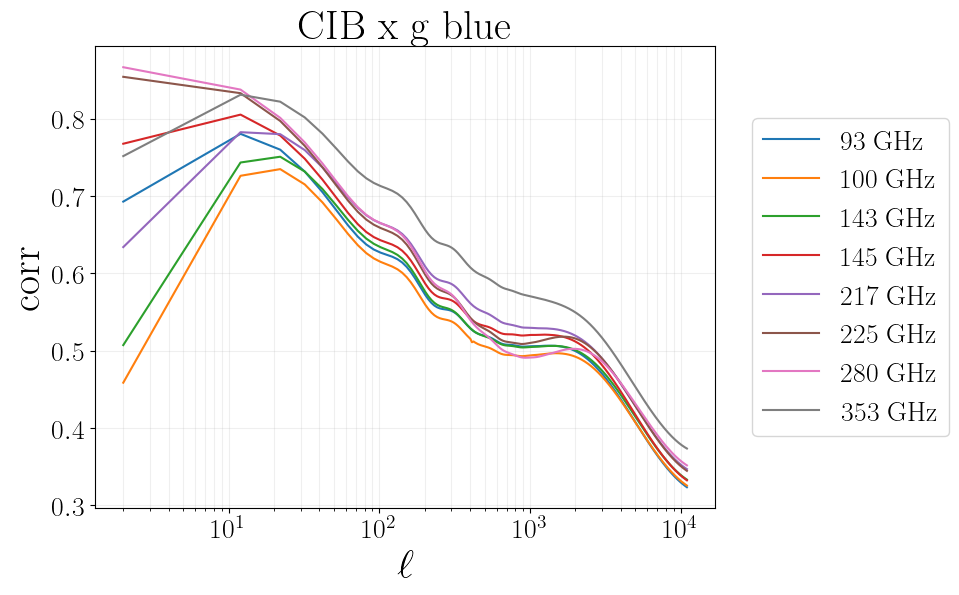

In [17]:
plotfunction()
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x g %.6s'%(color), fontsize=30)
plt.xscale('log')

for (i,nu) in enumerate(nu_list):
    ell, cib_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxg_wLensmag_"+color+".txt")
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    #shot noise
    ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_"+color+"_x_"+color+".txt")
    SN_gg = A_shot_noise * (ell)*(ell+1) /2/np.pi
    gg_full = gg + SN_gg

    corr = (cib_g) /np.sqrt((gg_full)*cib)   
    plt.plot(ell, corr, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)
plt.yscale("linear")

### with CIB shot noise

gg , shot noise % =  [0.02842078 0.01153577 0.01138924 ... 0.91262264 0.9127129  0.91280301]
CIB, shot noise % =  [0.02726079 0.01896668 0.01822142 ... 0.77869045 0.77882086 0.77895118]
gg , shot noise % =  [0.02842078 0.01153577 0.01138924 ... 0.91262264 0.9127129  0.91280301]
CIB, shot noise % =  [0.00655151 0.00987254 0.01032306 ... 0.68187955 0.68204542 0.68221123]
gg , shot noise % =  [0.02842078 0.01153577 0.01138924 ... 0.91262264 0.9127129  0.91280301]
CIB, shot noise % =  [0.00563497 0.00729161 0.00763654 ... 0.61508605 0.61527034 0.61545453]
gg , shot noise % =  [0.02842078 0.01153577 0.01138924 ... 0.91262264 0.9127129  0.91280301]
CIB, shot noise % =  [0.01446603 0.00816726 0.00768372 ... 0.59574311 0.5959285  0.59611379]
gg , shot noise % =  [0.02842078 0.01153577 0.01138924 ... 0.91262264 0.9127129  0.91280301]
CIB, shot noise % =  [0.00783395 0.0069424  0.00712167 ... 0.60239227 0.60258415 0.60277593]
gg , shot noise % =  [0.02842078 0.01153577 0.01138924 ... 0.91262264 

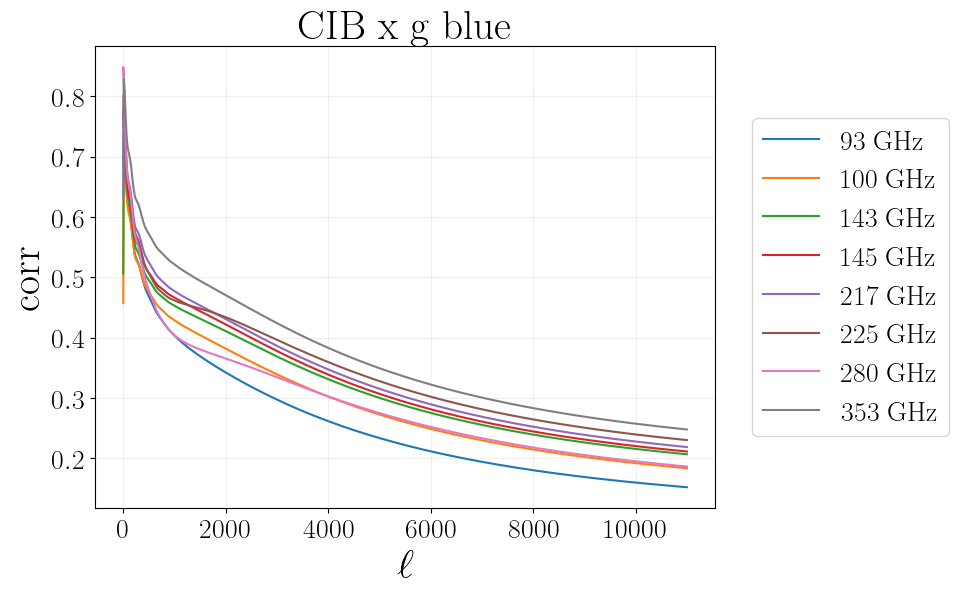

In [19]:
plotfunction()
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"corr", fontsize=30)
plt.title('CIB x g %.6s'%(color), fontsize=30)
plt.xscale('log')

for (i,nu) in enumerate(nu_list):
    ell, cib_g = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxg_wLensmag_"+color+".txt")
    ell, cib = np.loadtxt(path_to_files + str(nu)+"x"+str(nu)+"_GHz_CIBxCIB.txt")
    #shot noise
    ell, gg = np.loadtxt(path_to_files + "gxg_wLensmag_"+color+"_x_"+color+".txt")
    SN_gg = A_shot_noise * (ell)*(ell+1) /2/np.pi
    gg_full = gg + SN_gg
    print("gg , shot noise % = ", SN_gg /( SN_gg+gg) )

    cib_SN = cib_planck_table[str(nu)] * (ell)*(ell+1) /2/np.pi / convert_Jysr_to_uK(nu)**2
    cib_full = cib_SN +cib 
    print("CIB, shot noise % = ", cib_SN/(cib+cib_SN) )
    corr = (cib_g) /np.sqrt(gg_full*cib_full)   
    plt.plot(ell, corr, label=r'%.1i GHz '%(nu))
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)
plt.yscale("linear")
plt.xscale("linear")

# Compare to data 

In [52]:
color= "red"

## CIB x g from Lenz et al

In [53]:
freq = 353

In [54]:
#Measurments CIB x unWISE /Ola February '23
path_to_data_planckCIB = '/Users/aleksandra/Desktop/data_CIB_Planck/results/'

ell_data, cl_lenz, sigma_lenz = np.loadtxt(path_to_data_planckCIB+"CIB"+str(freq)+"_x_unWISE_"+color+"_Lenz_2.5e+20_gp20_MJysr.txt")
ell_data, cl_planck, sigma_planck = np.loadtxt(path_to_data_planckCIB+"Planck"+str(freq)+"_x_unWISE_"+color+"_MJysr.txt")


In [55]:
ell_class, cib_g_class = np.loadtxt(path_to_files + str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")
ell_class2, cib_g_class2 = np.loadtxt(path_to_files2 + str(freq)+"x"+str(freq)+"_GHz_CIBxg_wLensmag_"+color+".txt")

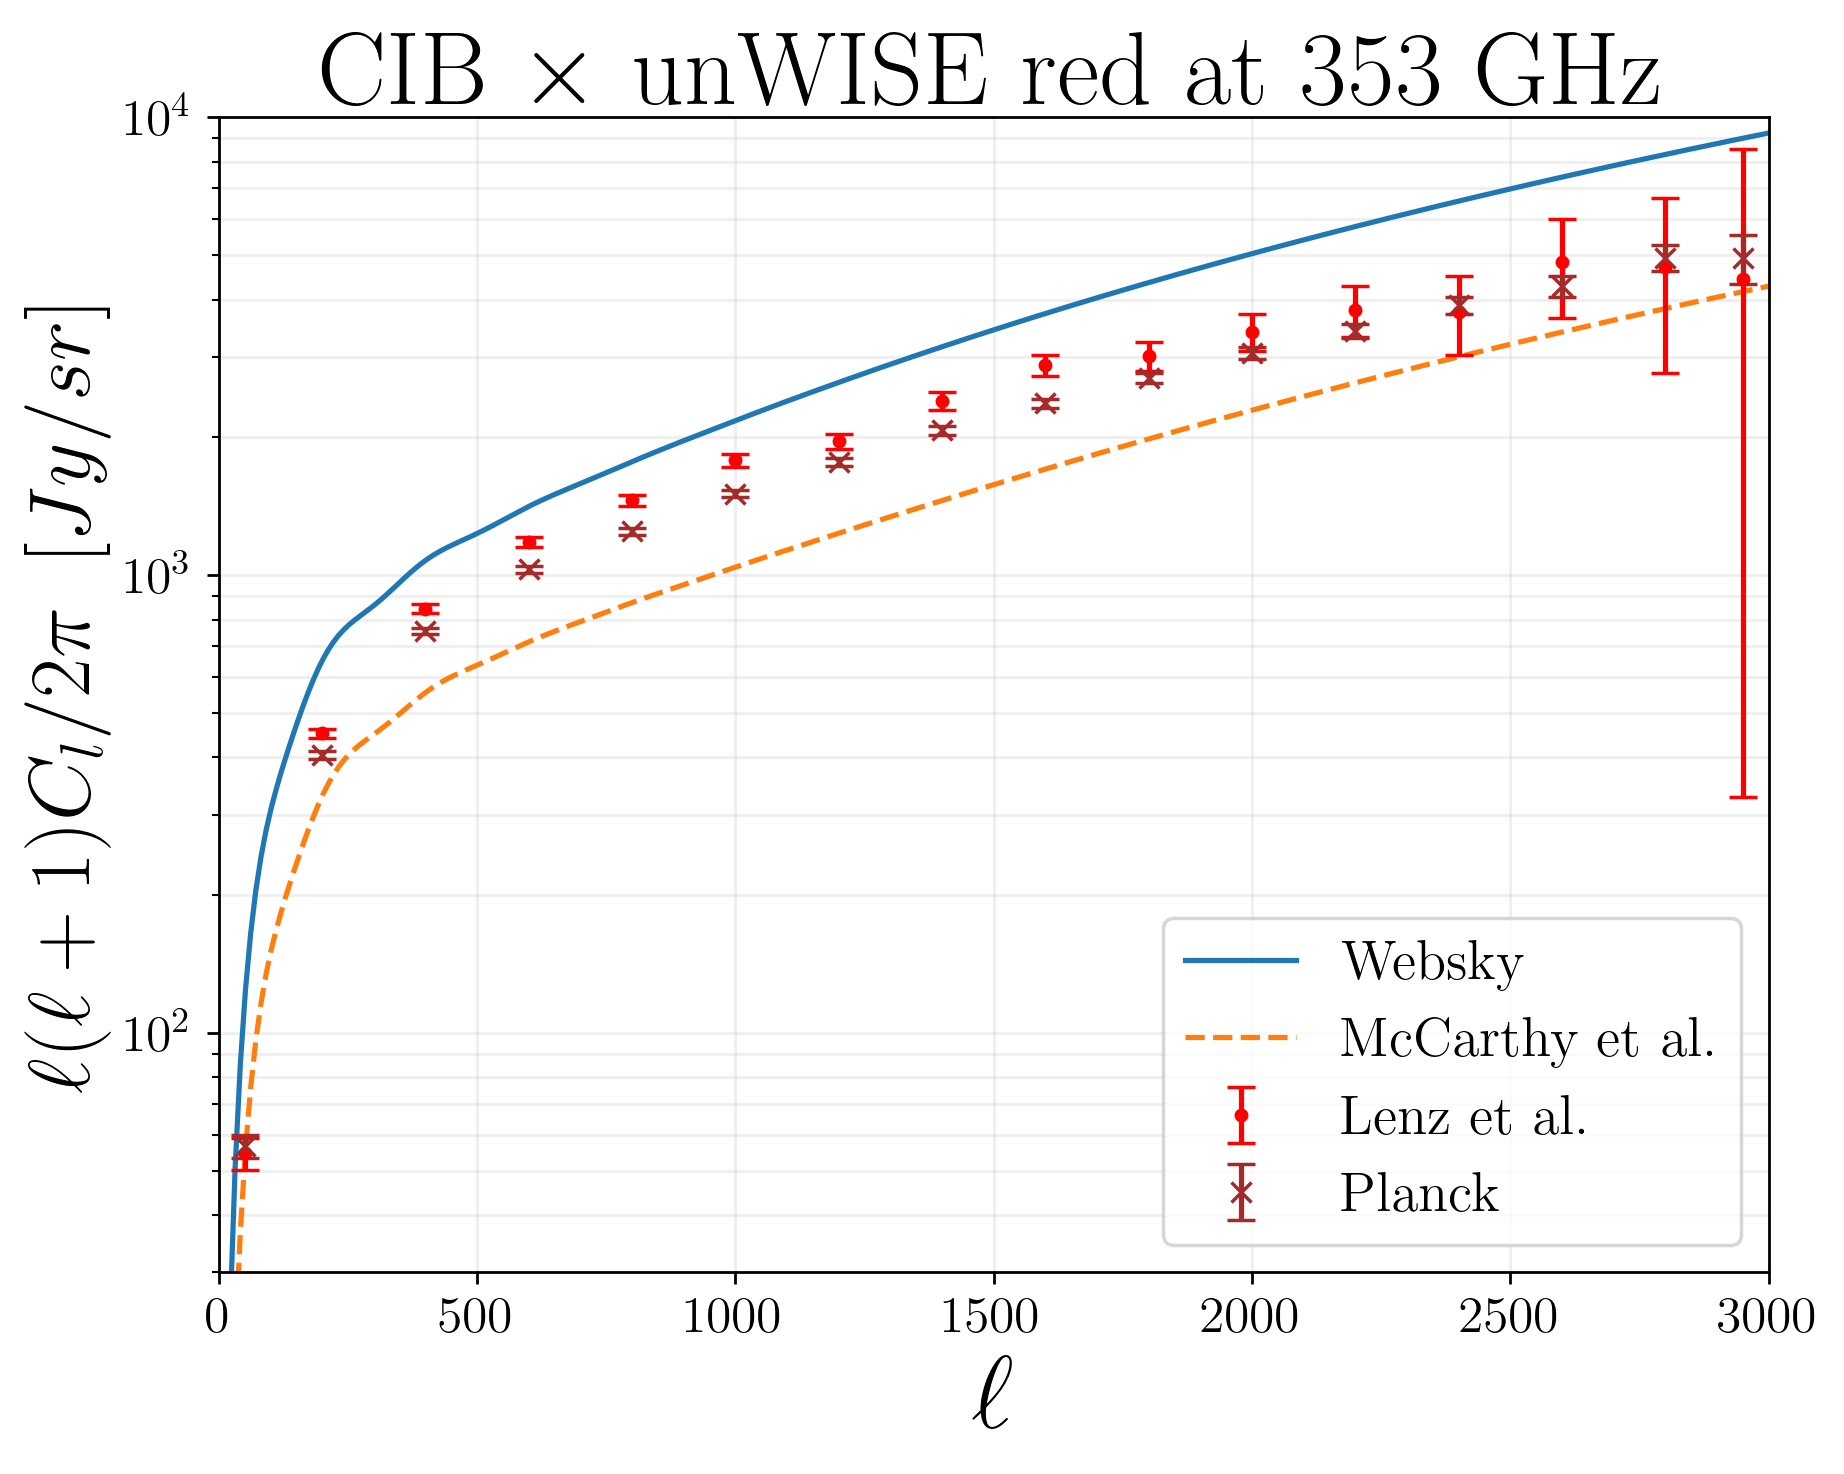

In [57]:
plt.figure(figsize=(8,6), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [Jy/sr]$", fontsize=25)
plt.title(' CIB $\\times$ unWISE  %.5s at %.3i GHz'%( color, freq,), fontsize=30)
                                    
plt.plot( ell_class, cib_g_class *convert_Jysr_to_uK(freq) , "-", label=r'Websky')
plt.plot( ell_class2, cib_g_class2 *convert_Jysr_to_uK(freq) , "--", label=r'McCarthy et al.')

#Lenz data
plt.errorbar(ell_data, cl_lenz*1e6, yerr = sigma_lenz*1e6,  fmt= ".", color = color , capsize=4, label=" Lenz et al. ")
#plt.errorbar(ell_data, cl_planck*1e6, yerr = sigma_planck*1e6,  fmt= "x", color = "light"+color, capsize=4, label=" Planck")
plt.errorbar(ell_data, cl_planck*1e6, yerr = sigma_planck*1e6,  fmt= "x", color = "brown", capsize=4, label=" Planck")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 3.e3)
plt.ylim(3e1,1.e4)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='lower right', fontsize=16)